**UNGGAH DATASET DARI GDRIVE**

In [2]:
!gdown --fuzzy https://drive.google.com/file/d/1gedEfXiwtqgiJuwPRQ8nifWaU1PGSUV6/view?usp=sharing

Downloading...
From (original): https://drive.google.com/uc?id=1gedEfXiwtqgiJuwPRQ8nifWaU1PGSUV6
From (redirected): https://drive.google.com/uc?id=1gedEfXiwtqgiJuwPRQ8nifWaU1PGSUV6&confirm=t&uuid=a638b88e-cb21-427e-902a-6739c4b6ea50
To: /content/FishImgDataset.zip
100% 1.70G/1.70G [00:26<00:00, 64.1MB/s]


**UNZIP DATASET YANG TELAH DIUNDUH**

In [3]:
!unzip FishImgDataset.zip -d /content/

Streaming output truncated to the last 5000 lines.
  inflating: /content/FishImgDataset/train/Pangasius/Picture687.jpg  
  inflating: /content/FishImgDataset/train/Pangasius/Picture688.jpg  
  inflating: /content/FishImgDataset/train/Pangasius/Picture689.jpg  
  inflating: /content/FishImgDataset/train/Pangasius/Picture690.jpg  
  inflating: /content/FishImgDataset/train/Pangasius/Picture691.jpg  
  inflating: /content/FishImgDataset/train/Pangasius/Picture692.jpg  
  inflating: /content/FishImgDataset/train/Pangasius/Picture695.jpg  
  inflating: /content/FishImgDataset/train/Pangasius/Picture696.jpg  
  inflating: /content/FishImgDataset/train/Pangasius/Picture697.jpg  
  inflating: /content/FishImgDataset/train/Pangasius/Picture698.jpg  
  inflating: /content/FishImgDataset/train/Pangasius/Picture699.jpg  
  inflating: /content/FishImgDataset/train/Pangasius/Picture700.jpg  
  inflating: /content/FishImgDataset/train/Pangasius/Picture701.jpg  
  inflating: /content/FishImgDataset/tr

**LIBRARY**

In [4]:
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

**MENGKONFIGURASI DATASET**

In [5]:
dataset_path = '/content/FishImgDataset'
path_train = os.path.join(dataset_path, 'train')
path_valid = os.path.join(dataset_path, 'val')
path_test = os.path.join(dataset_path, 'test')

print("Training set path:", path_train)
print("Validation set path:", path_valid)
print("Testing set path:", path_test)

IMG_SHAPE = (180, 180)
BATCH = 32
SEED = 123

Training set path: /content/FishImgDataset/train
Validation set path: /content/FishImgDataset/val
Testing set path: /content/FishImgDataset/test


**LOAD DATASET**

In [6]:
ds_train = tf.keras.utils.image_dataset_from_directory(
    path_train,
    image_size=IMG_SHAPE,
    batch_size=BATCH,
    label_mode='int',
    seed=SEED
)

ds_valid = tf.keras.utils.image_dataset_from_directory(
    path_valid,
    image_size=IMG_SHAPE,
    batch_size=BATCH,
    label_mode='int',
    seed=SEED
)

ds_test = tf.keras.utils.image_dataset_from_directory(
    path_test,
    image_size=IMG_SHAPE,
    batch_size=BATCH,
    label_mode='int',
    shuffle=False
)

Found 8819 files belonging to 31 classes.
Found 2751 files belonging to 31 classes.
Found 1761 files belonging to 31 classes.


**OPTIMASI PIPELINE, DATA AUGMENTATION, DAN NORMALISASI**

In [7]:
labels = ds_train.class_names
n_classes = len(labels)
print("Kelas yang terdeteksi:", labels)

AUTOTUNE = tf.data.AUTOTUNE
ds_train = ds_train.cache().shuffle(1000).prefetch(AUTOTUNE)
ds_valid = ds_valid.cache().prefetch(AUTOTUNE)
ds_test = ds_test.cache().prefetch(AUTOTUNE)

augment_layer = tf.keras.Sequential([
    tf.keras.layers.RandomFlip("horizontal"),
    tf.keras.layers.RandomRotation(0.1),
    tf.keras.layers.RandomZoom(0.1)
])

normalize_layer = tf.keras.layers.Rescaling(1./255)

Kelas yang terdeteksi: ['Bangus', 'Big Head Carp', 'Black Spotted Barb', 'Catfish', 'Climbing Perch', 'Fourfinger Threadfin', 'Freshwater Eel', 'Glass Perchlet', 'Goby', 'Gold Fish', 'Gourami', 'Grass Carp', 'Green Spotted Puffer', 'Indian Carp', 'Indo-Pacific Tarpon', 'Jaguar Gapote', 'Janitor Fish', 'Knifefish', 'Long-Snouted Pipefish', 'Mosquito Fish', 'Mudfish', 'Mullet', 'Pangasius', 'Perch', 'Scat Fish', 'Silver Barb', 'Silver Carp', 'Silver Perch', 'Snakehead', 'Tenpounder', 'Tilapia']


**MODEL CNN**

In [8]:
cnn_model = tf.keras.Sequential([
    tf.keras.layers.InputLayer(input_shape=(*IMG_SHAPE, 3)),
    augment_layer,
    normalize_layer,

    tf.keras.layers.Conv2D(32, 3, activation='relu'),
    tf.keras.layers.MaxPooling2D(),

    tf.keras.layers.Conv2D(64, 3, activation='relu'),
    tf.keras.layers.MaxPooling2D(),

    tf.keras.layers.Conv2D(128, 3, activation='relu'),
    tf.keras.layers.MaxPooling2D(),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(n_classes, activation='softmax')
])

cnn_model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

cnn_model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ sequential (Sequential)         │ (None, 180, 180, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ rescaling (Rescaling)           │ (None, 180, 180, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 178, 178, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 89, 89, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 87, 87, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 43, 43, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 41, 41, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 20, 20, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 51200)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     6,553,728 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 31)             │         3,999 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 6,650,975 (25.37 MB)

 Trainable params: 6,650,975 (25.37 MB)

 Non-trainable params: 0 (0.00 B)

**MODEL TRAINING**

In [9]:
EPOCH_TOTAL = 20
history = cnn_model.fit(
    ds_train,
    validation_data=ds_valid,
    epochs=EPOCH_TOTAL
)

test_loss, test_acc = cnn_model.evaluate(ds_test)
print(f"Test Set Accuracy: {test_acc:.2f}")

Epoch 1/20
276/276 ━━━━━━━━━━━━━━━━━━━━ 699s 2s/step - accuracy: 0.1696 - loss: 3.1568 - val_accuracy: 0.3264 - val_loss: 2.4231
Epoch 2/20
276/276 ━━━━━━━━━━━━━━━━━━━━ 673s 2s/step - accuracy: 0.3312 - loss: 2.3834 - val_accuracy: 0.3748 - val_loss: 2.2335
Epoch 3/20
276/276 ━━━━━━━━━━━━━━━━━━━━ 684s 2s/step - accuracy: 0.3889 - loss: 2.1339 - val_accuracy: 0.4424 - val_loss: 1.9747
Epoch 4/20
276/276 ━━━━━━━━━━━━━━━━━━━━ 682s 2s/step - accuracy: 0.4529 - loss: 1.8787 - val_accuracy: 0.4726 - val_loss: 1.8543
Epoch 5/20
276/276 ━━━━━━━━━━━━━━━━━━━━ 629s 2s/step - accuracy: 0.5054 - loss: 1.7311 - val_accuracy: 0.5482 - val_loss: 1.6366
Epoch 6/20
276/276 ━━━━━━━━━━━━━━━━━━━━ 621s 2s/step - accuracy: 0.5363 - loss: 1.5770 - val_accuracy: 0.5391 - val_loss: 1.6411
Epoch 7/20
276/276 ━━━━━━━━━━━━━━━━━━━━ 622s 2s/step - accuracy: 0.5606 - loss: 1.4987 - val_accuracy: 0.5816 - val_loss: 1.4796
Epoch 8/20
276/276 ━━━━━━━━━━━━━━━━━━━━ 625s 2s/step - accuracy: 0.5946 - loss: 1.3781 - val_accu

**EVALUASI MODEL DAN VISUALISASI**

56/56 ━━━━━━━━━━━━━━━━━━━━ 32s 556ms/step - accuracy: 0.7103 - loss: 1.0037
Test Accuracy: 0.75
56/56 ━━━━━━━━━━━━━━━━━━━━ 29s 520ms/step

Classification Report:
                       precision    recall  f1-score   support

               Bangus       0.75      0.53      0.62        34
        Big Head Carp       0.71      0.40      0.51        43
   Black Spotted Barb       0.96      0.60      0.74        40
              Catfish       0.53      0.84      0.65        62
       Climbing Perch       0.55      0.57      0.56        30
 Fourfinger Threadfin       0.81      0.66      0.72        38
       Freshwater Eel       0.62      0.58      0.60        55
       Glass Perchlet       0.94      0.75      0.83        77
                 Goby       0.82      0.69      0.75       124
            Gold Fish       1.00      0.95      0.97        41
              Gourami       0.89      0.89      0.89        63
           Grass Carp       0.87      0.93      0.90       238
 Green Spotted Puf

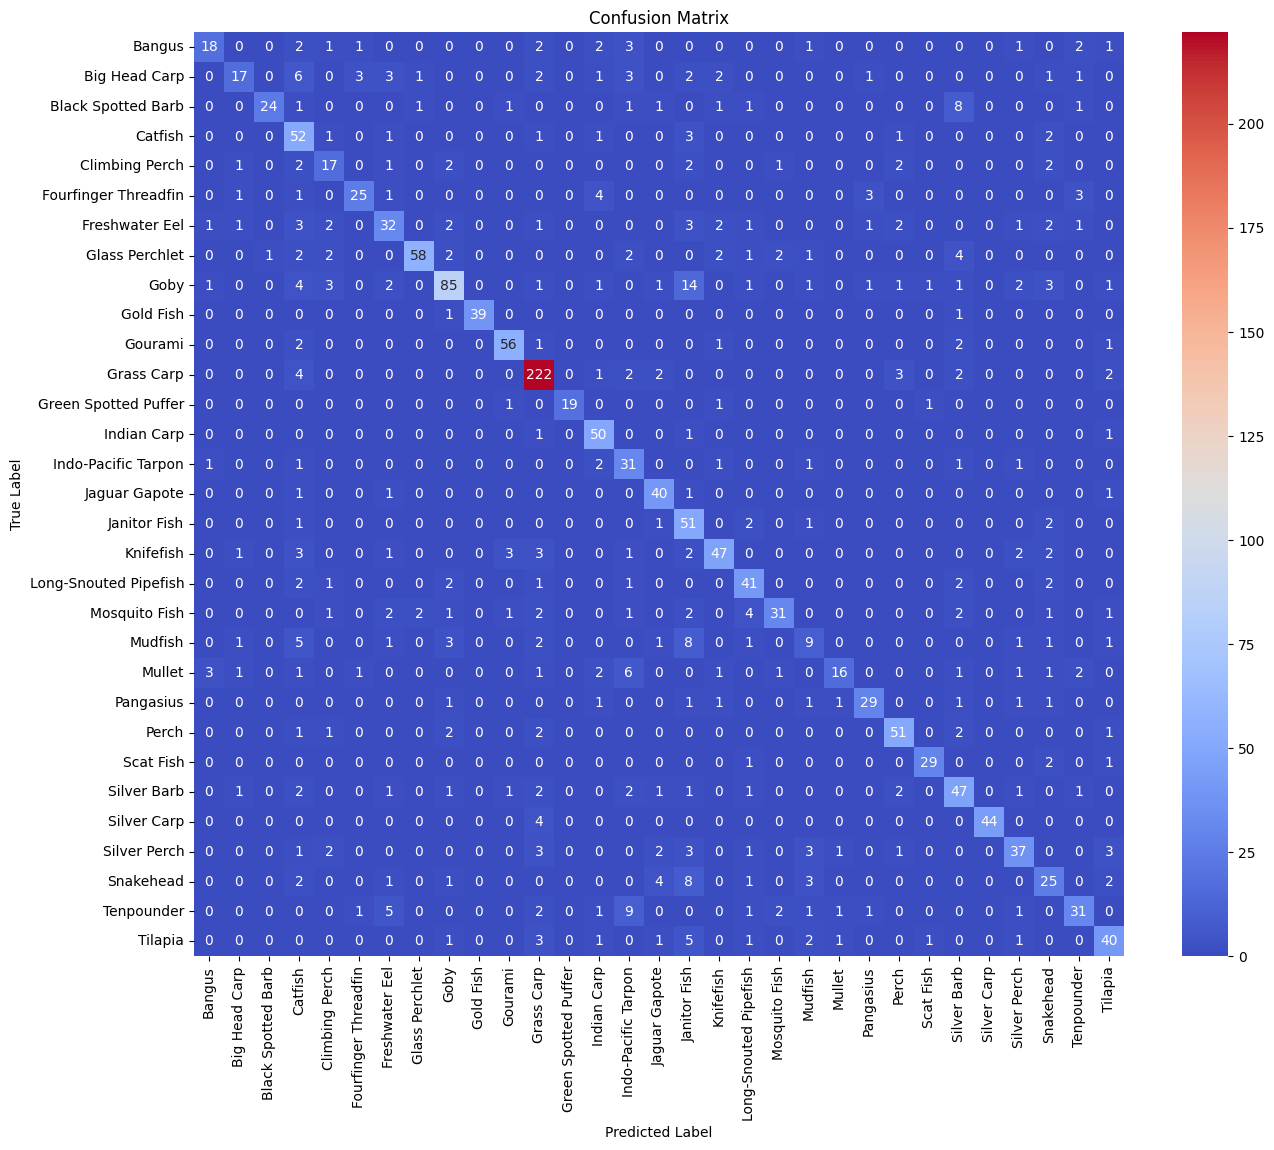

In [16]:
loss, accuracy = cnn_model.evaluate(ds_test)
print(f"Test Accuracy: {accuracy:.2f}")

y_pred_probs = cnn_model.predict(ds_test)
y_pred = np.argmax(y_pred_probs, axis=1)
y_true = np.concatenate([y for x, y in ds_test], axis=0)

print("\nClassification Report:")
print(classification_report(y_true, y_pred, target_names=labels))

auc_roc = roc_auc_score(y_true, y_pred_probs, multi_class='ovr')
print(f"\nAUC-ROC Score (One-vs-Rest): {auc_roc:.2f}")

cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(15, 12))

sns.heatmap(cm, annot=True, fmt='d', cmap='coolwarm', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

### Matriks Evaluasi Global

Kinerja model secara keseluruhan:

| Matriks Evaluasi          | Nilai |
| :------------------------ | :---- |
| Akurasi                   | 0.71  |
| *Macro Average F1-Score* | 0.68  |
| *Weighted Average F1-Score* | 0.71  |


### Penjelasan Metrik Evaluasi

1.  **Akurasi**
    * Akurasi 0.71 menunjukkan bahwa 71% prediksi model pada data uji sesuai dengan label yang benar.
    * Metrik ini mudah dipahami dan representatif jika distribusi kelas pada dataset seimbang.
    * Namun, pada klasifikasi multikelas dengan distribusi data tidak merata, seperti yang terindikasi pada dataset ini, akurasi kurang mampu menggambarkan kinerja model secara menyeluruh.

2.  ***Macro Average F1-Score***
    * *Macro Average F1-Score* berada di angka 0.68.
    * Metrik ini merupakan rata-rata *F1-Score* dari setiap kelas, tanpa mempertimbangkan jumlah sampel per kelas (*support*).
    * Oleh karena itu, *macro average F1-Score* lebih relevan untuk mengevaluasi kinerja model secara seimbang di seluruh kelas, termasuk kelas minoritas.

3.  ***Weighted Average F1-Score***
    * *Weighted Average F1-Score* mencapai 0.71.
    * Metrik ini dihitung dengan membobot *F1-Score* setiap kelas berdasarkan jumlah sampel di masing-masing kelasnya.
    * Dengan demikian, *weighted average F1-Score* lebih merepresentasikan kondisi nyata performa model terhadap keseluruhan data uji, karena memperhitungkan distribusi data yang ada.

### Matriks Evaluasi Terbaik

Berdasarkan hasil evaluasi ini, *F1-Score* (baik dalam bentuk *macro average* maupun *weighted average*) adalah metrik yang paling sesuai untuk menilai kinerja model pada skenario klasifikasi multikelas dengan distribusi data yang tidak merata. Kemampuan *F1-Score* dalam menyeimbangkan *precision* dan *recall* di setiap kelas menjadikannya pilihan yang kuat.

Dalam memilih antara *macro* dan *weighted average F1-Score*, pertimbangkan tujuan evaluasi:
* Jika tujuan adalah memastikan performa yang setara di semua kelas, termasuk kelas minoritas, *macro average* lebih tepat.
* Jika yang ingin dinilai adalah performa model secara keseluruhan dengan mempertimbangkan proporsi jumlah data, *weighted average* dapat digunakan.

Secara ringkas, *F1-Score* adalah indikator kinerja yang paling relevan dalam evaluasi model ini.